## Advanced Time Series Modeling

### Learning Objectives
By the end of this lesson, students should be able to:
- Create a proper train/test split on time series data.
- Identify when seasonality exists in time series data.
- Fit and tune a SARIMAX model.
- Fit a multivariate time series model.

### Review

<details><summary>Check: When do we use an AR (autoregressive) model? (THREAD)</summary>

- We use an AR model when we are measuring/predicting **long-term trends**.
</details>

---

<details><summary>Check: When do we use an MA (moving average) model? (THREAD)</summary>

- We fit an MA model when we anticipate our time series will have **substantial, sudden shocks** in the data.
</details>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
import pmdarima as pm

# Load some Time Series Data
- Data from Kaggle: [Link](https://www.kaggle.com/podsyp/time-series-starter-dataset)

In [2]:
# Read in Data
sales = pd.read_csv('../datasets/Month_Value_1.csv')
sales = sales.dropna()

print(sales.shape)
sales.head(20)

(64, 5)


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
5,01.06.2015,1.678393e+07,13160.0,1275.374508,30024676.0
6,01.07.2015,1.916189e+07,17254.0,1110.576805,30024676.0
7,01.08.2015,1.520498e+07,8642.0,1759.428870,30024676.0
8,01.09.2015,2.060394e+07,16144.0,1276.259909,30024676.0
9,01.10.2015,2.099287e+07,18135.0,1157.588904,30024676.0


In [3]:
# Convert 'Period' column to pd.to_datetime using a custom format of %d.%m.%y!
sales['Period'] = pd.to_datetime(sales['Period'], format='%d.%m.%Y')

print(sales.shape)
sales.head(20)

(64, 5)


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
5,2015-06-01,1.678393e+07,13160.0,1275.374508,30024676.0
6,2015-07-01,1.916189e+07,17254.0,1110.576805,30024676.0
7,2015-08-01,1.520498e+07,8642.0,1759.428870,30024676.0
8,2015-09-01,2.060394e+07,16144.0,1276.259909,30024676.0
9,2015-10-01,2.099287e+07,18135.0,1157.588904,30024676.0


In [4]:
# Reset index to be Period.
sales = sales.set_index('Period')
sales = sales.sort_index()

print(sales.shape)
sales.head()

(64, 4)


,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


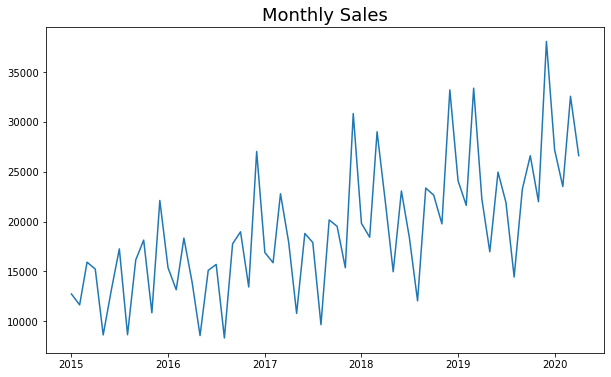

In [5]:
# Plot the Sales
plt.figure(figsize=(10,6))
plt.plot(sales['Sales_quantity'])
plt.title(label = 'Monthly Sales', fontsize=18)
plt.show();

# Let's try to Forecast Sales Quantity!

## Train/Test Split

Our goal, as with all train/test splits, is to:
- avoid overfitting in our model, and
- to get an unbiased estimate of model performance on new, "unseen" data.

When fitting a time series model, we shouldn't do a random train-test split like we do with non-correlated data.

Since our goal with time series analysis is almost always to forecast values forward in time, the idea with a time series train/test split is to train on earlier data and test/evaluate on later data.

We can use Time Series cross validation as well by using the `TimeSeriesSplit` from sklearn. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)

![](../images/timeseriessplit.png)

In [6]:
y = sales['Sales_quantity']

y_train = y[:'2018']
y_test = y['2019':]

print(y_train.tail())
print(y_test.head())

Period
2018-08-01    12045.0
2018-09-01    23358.0
2018-10-01    22644.0
2018-11-01    19765.0
2018-12-01    33207.0
Name: Sales_quantity, dtype: float64
Period
2019-01-01    24096.0
2019-02-01    21624.0
2019-03-01    33379.0
2019-04-01    22265.0
2019-05-01    16967.0
Name: Sales_quantity, dtype: float64


In [7]:
# Fit Auto ARIMA
arima_model = pm.AutoARIMA(start_p=0, max_p=10, 
                           d=None,    # find optimum value of d automatically
                           start_q=0, max_q=10,
                           # start_P=0, max_P=10,
                           # D=None,
                           # start_Q=0, max_Q=10,
                           # m=12, # For monthly data since the pattern repeats every 12 months
                           # seasonal=True,
                           trace=True, # Print values for each fit in the grid search
                           random=True,
                           random_state=20,
                           n_fits=50
                          )

arima_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=972.398, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=961.584, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=970.580, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=927.222, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=923.020, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=925.165, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=924.993, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=926.542, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=926.472, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=922.497, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=927.624, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=924.619, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=924.446, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=924.661, 

AutoARIMA(max_p=10, max_q=10, n_fits=50, random=True, random_state=20,
          start_p=0, start_q=0, trace=True)

In [8]:
# Create an helper function to help make predictions and plot the results
def plot_forecast(y_train, y_test, arima_model, X_test=None):
    # Generate len(y_test) number of predictions
    y_pred = arima_model.predict(n_periods = len(y_test), X=X_test)

    # Plot data.
    plt.figure(figsize=(10,6))

    # Plot training data.
    plt.plot(y_train, color='blue', label='y_train')

    # Plot testing data.
    plt.plot(y_test, color='orange', label='y_test')

    # Plot predicted test values.
    plt.plot(y_test.index, y_pred, color='green', label='y_pred')
    
    # Find the MAPE of the predictions
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
    mape = mean_absolute_percentage_error(y_test, y_pred)

    plt.title(label = f'Sales Predictions\n MAPE: {mape:.2f}', fontsize=16)
    plt.legend();

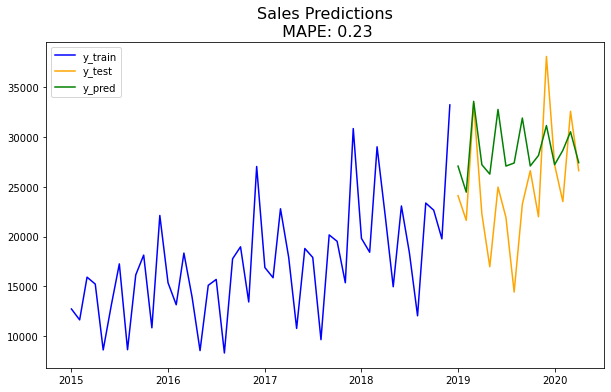

In [9]:
plot_forecast(y_train, y_test, arima_model)

## SARIMA
- The above ARIMA model is not very good at forecasting
- Let's try a **seasonal ARIMA (SARIMA) model** to our data.
- We can think of seasonality as a repeating pattern (like a cycle) that occurs over time.
- This model will:
    - Have the ARIMA components we've described thus far, which are good for stationary trends.
    - Include a seasonal component that will allow us to also account for seasonality that occurs over time.

The SARIMA model is given by $ARIMA(p, d, q) × (P, D, Q, S)$, where:
- $ARIMA(p, d, q)$ is the ARIMA model we've already discussed with AR order $p$, MA order $q$, and differencing order $d$.
- $(P, D, Q, S)$ refers to the seasonal AR order $P$, the seasonal MA order $Q$, the seasonal differencing order $D$, and the length of the season $S$.

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

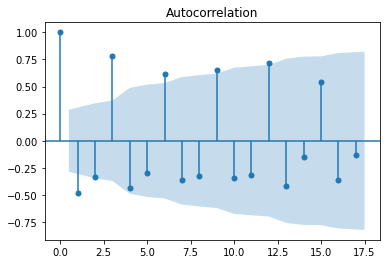

In [15]:
# Generate partial autocorrelation plot on training data.
plot_acf(y_train.diff().dropna());

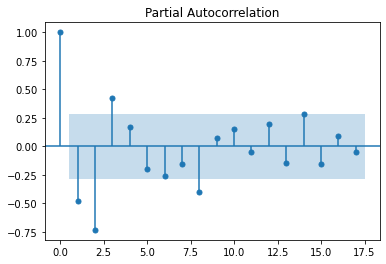

In [11]:
# Generate partial autocorrelation plot on training data.
plot_pacf(y_train.diff().dropna(), method='ywm'); # Repition of 3

In [12]:
# Fit Auto ARIMA
arima_model = pm.AutoARIMA(start_p=0, max_p=10, 
                           d=None,    # find optimum value of d automatically
                           start_q=0, max_q=10,
                           start_P=0, max_P=10,
                           D=None,
                           start_Q=0, max_Q=10,
                           m=3, # Since the peak occurs every 3 months! (4 peaks per year)
                           seasonal=True,
                           trace=True, # Print values for each fit in the grid search
                           random=True,
                           random_state=20,
                           n_fits=50
                          )

arima_model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=878.691, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=874.528, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=868.946, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=878.373, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[3] intercept   : AIC=876.572, Time=0.01 sec
 ARIMA(0,0,1)(1,1,1)[3] intercept   : AIC=870.851, Time=0.03 sec
 ARIMA(0,0,1)(0,1,2)[3] intercept   : AIC=865.787, Time=0.12 sec
 ARIMA(0,0,1)(1,1,2)[3] intercept   : AIC=867.057, Time=0.17 sec
 ARIMA(0,0,1)(0,1,3)[3] intercept   : AIC=870.551, Time=0.04 sec
 ARIMA(0,0,1)(1,1,3)[3] intercept   : AIC=871.960, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[3] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,1,2)[3] intercept   : AIC=864.657, Time=0.10 sec
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=865.373, Time=0.12 sec
 ARIMA(1,0,1)(1,1,2)[3] intercept   : AIC=866.149, Time=0.23 sec
 ARIMA(1,0,1)(0,1,3)[3] intercept   : AIC=863.081, 

AutoARIMA(m=3, max_P=10, max_Q=10, max_p=10, max_q=10, n_fits=50, random=True,
          random_state=20, start_P=0, start_Q=0, start_p=0, start_q=0,
          trace=True)

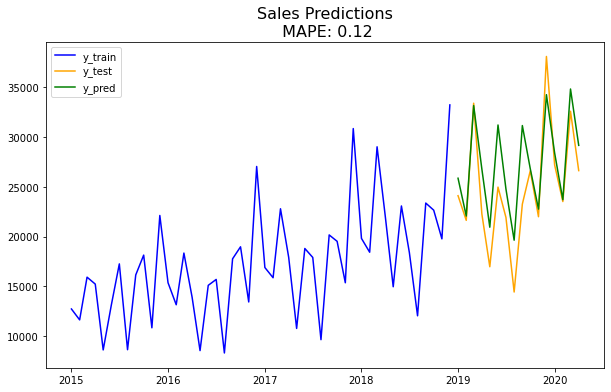

In [13]:
plot_forecast(y_train, y_test, arima_model)

## SARIMAX - Add Exogenous features

In time series analysis, we spend most of our time focused on how we can quantify the relationship between $Y_t$ and $Y_{t-k}$ and then use that relationship to forecast values of $Y_{t+k}$.

Future Sales probably isn't limited to just past Sales but also on other features such as the cost of items, etc. These additional features can be added into the SARIMA model to make it a SARIMAX model.

The SARIMAX model stands for "Seasonal Autoregressive Integrated Moving Average with eXogenous regressors model."

#### One important practical note: 
If you're going to fit a SARIMAX model, make sure that your $X$ variable makes sense - especially timewise.
> For example, if we want to forecast Sales for December 2018 based on Cost, I probably shouldn't use Cost in December 2018 as an input. (I'm forecasting a value of $Y$ when I wouldn't have access to that value of $X$.)

I should probably lag my $X$ variable by at least one time point. 


| Index | Sales t | Cost t-1 |
|-------|---------|----------|
| 1     | Sales 1 | NA       |
| 2     | Sales 2 | Cost 1   |
| 3     | Sales 3 | Cost 2   |
| 4     | Sales 4 | Cost 3   |

- We can easily do this with the `df.shift()` function

In [10]:
sales.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


In [11]:
# Let's see if adding last month's Revenue and last month's average cost can help improve the model
sales['last_month_revenue'] = sales['Revenue'].shift(1)
sales['last_month_average_cost'] = sales['Average_cost'].shift(1)
sales = sales.dropna()

sales.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,last_month_revenue,last_month_average_cost
Period,,,,,,
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0,1.601007e+07,1257.763541
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0,1.580759e+07,1358.507000
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0,2.204715e+07,1384.697024
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0,1.881458e+07,1235.606705
2015-06-01,1.678393e+07,13160.0,1275.374508,30024676.0,1.402148e+07,1626.621765


In [12]:
# Adding Exogenous variables
X = sales[['last_month_revenue', 'last_month_average_cost']]

X_train = X[:'2018']
X_test = X['2019':]

y = sales['Sales_quantity']

y_train = y[:'2018']
y_test = y['2019':]

print(X_train.tail())
print(X_test.head())

            last_month_revenue  last_month_average_cost
Period                                                 
2018-08-01        3.582653e+07              1947.411801
2018-09-01        2.326866e+07              1931.810312
2018-10-01        3.542349e+07              1516.546359
2018-11-01        3.983157e+07              1759.033991
2018-12-01        3.299915e+07              1669.574764
            last_month_revenue  last_month_average_cost
Period                                                 
2019-01-01        4.722183e+07              1422.044394
2019-02-01        3.645996e+07              1513.112554
2019-03-01        3.654650e+07              1690.089653
2019-04-01        5.419871e+07              1623.736682
2019-05-01        3.274399e+07              1470.648534


In [13]:
# Fit Auto ARIMA
arima_model = pm.AutoARIMA(start_p=0, max_p=10, 
                           d=None,    # find optimum value of d automatically
                           start_q=0, max_q=10,
                           start_P=0, max_P=10,
                           D=None,
                           start_Q=0, max_Q=10,
                           m=3, # For monthly data since the pattern repeats every 12 months
                           seasonal=True,
                           trace=True, # Print values for each fit in the grid search
                           random=True,
                           random_state=20,
                           n_fits=50
                          )

arima_model.fit(y_train, X_train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=852.582, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=853.385, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=858.870, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=974.855, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[3] intercept   : AIC=853.927, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[3] intercept   : AIC=855.728, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[3] intercept   : AIC=850.252, Time=0.16 sec
 ARIMA(0,0,0)(2,1,1)[3] intercept   : AIC=867.928, Time=0.05 sec
 ARIMA(0,0,0)(1,1,2)[3] intercept   : AIC=852.388, Time=0.14 sec
 ARIMA(0,0,0)(0,1,2)[3] intercept   : AIC=850.439, Time=0.09 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=858.174, Time=0.04 sec
 ARIMA(0,0,0)(2,1,2)[3] intercept   : AIC=849.238, Time=0.15 sec
 ARIMA(0,0,0)(3,1,2)[3] intercept   : AIC=865.358, Time=0.15 sec
 ARIMA(0,0,0)(2,1,3)[3] intercept   : AIC=861.534, Time=0.09 sec
 ARIMA(0,0,0)(1,1,3)[3] intercept   : AIC=853.2

AutoARIMA(m=3, max_P=10, max_Q=10, max_p=10, max_q=10, n_fits=50, random=True,
          random_state=20, start_P=0, start_Q=0, start_p=0, start_q=0,
          trace=True)

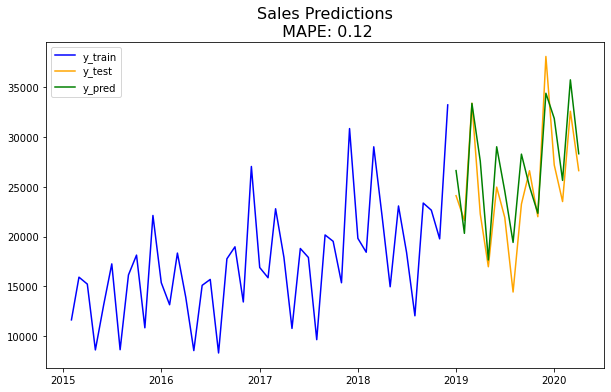

In [14]:
plot_forecast(y_train, y_test, arima_model, X_test=X_test)

## Wrap-Up
We have covered **a lot** about time series analysis:
- Pandas tricks for handling time series data.
- Autoregressive models.
- Moving average models.
- Integrated autoregressive and moving average models.
- Properly creating a train/test split for time series data.
- Fitting a model that accounts for seasonality.
- Auto ARIMA!
- Fittng a time series model with additional independent (exogenous) variables.

There's so much information about time series analysis out there; we've only just scratched the surface! However, hopefully you have greater context for how to properly handle time series problems and what to keep your eye out for as you build models with some [temporal](http://desktop.arcgis.com/en/arcmap/10.3/map/time/what-is-temporal-data.htm) component.

### Interested in exploring more?
- Go on Kaggle and explore some time series dataset
- Explore cross-validation ([here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) and [here](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)) in time series data.